In [1]:
# Basic Imports and Required Imports
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")
%matplotlib inline

# 1) Lets Visualize the Current Availability of the Charging Stations for EVs in India

In [2]:
state_df = pd.read_csv("RS_Session_257_AU_2368_B_3.csv")
state_df.head(20)

,Sl. no.,State/UT,City,Operational Charging stations Under FAME-II
0,1,Delhi,Delhi,15
1,2,Maharashtra,Navi Mumbai,1
2,3,Maharashtra,Nagpur,7
3,4,Tamil Nadu,Chennai,8
4,5,Kerala,Thrissur,8
5,6,Kerala,Ernakulum,6
6,7,Kerala,Kannur,2
7,8,Gujarat,Ahmedabad,2
8,9,Karnataka,Bangalore,1
9,10,Madhya Pradesh,Indore,2


In [3]:
new_state_df = state_df.drop(labels=11,axis=0)
new_state_df.head(20)

,Sl. no.,State/UT,City,Operational Charging stations Under FAME-II
0,1,Delhi,Delhi,15
1,2,Maharashtra,Navi Mumbai,1
2,3,Maharashtra,Nagpur,7
3,4,Tamil Nadu,Chennai,8
4,5,Kerala,Thrissur,8
5,6,Kerala,Ernakulum,6
6,7,Kerala,Kannur,2
7,8,Gujarat,Ahmedabad,2
8,9,Karnataka,Bangalore,1
9,10,Madhya Pradesh,Indore,2


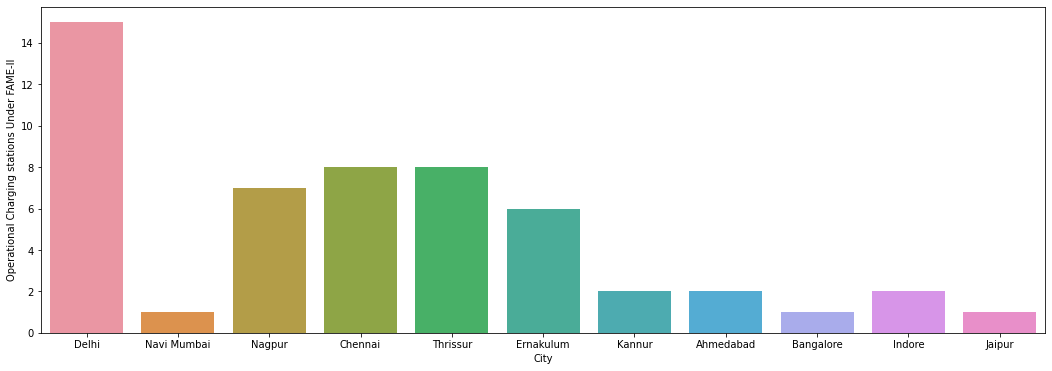

In [4]:
plt.figure(figsize=(18,6))
sns.barplot(x='City',y='Operational Charging stations Under FAME-II',data=new_state_df)
plt.show()

# Interim Conclusion for Charging Station Availability with respect to FAME 2 Government of India

### 1) First observation, only limited number of charging station is available in india as of 2023
### 2) Delhi being capital has more number of charging station as compared to other metro cities
### 3) South Indian metro cities have balanced number, but still many cities are missing from south india
### 4) Mumbai being the economic capital of india have only 1 charging station in Navi Mumbai(private charging stations not counted or being missed)

## Final Conclusion:
### a)In order to make the public comfortable with Electric Vehicle Environmnet, Infrastructure development will play the key role in EV market
### b)charging stations are only available in metro cities currently. other small cities and towns should also needed to be included.
# .................................................................................................................................

# 2) Lets Visualise number of operation electric vehicles in the states of India

In [5]:
df_EV_numbers = pd.read_csv('geoMap.csv')
df_EV_numbers.head()

,Region,no_of_EV
0,Tamil Nadu,100.0
1,Karnataka,97.0
2,Haryana,88.0
3,Goa,85.0
4,Maharashtra,85.0


In [6]:
# The data was missing so to remove null values, the null values are replaced with zero

df_EV_numbers['no_of_EV'].fillna(0,inplace=True)
df_EV_numbers.isnull().sum()

Region      0
no_of_EV    0
dtype: int64

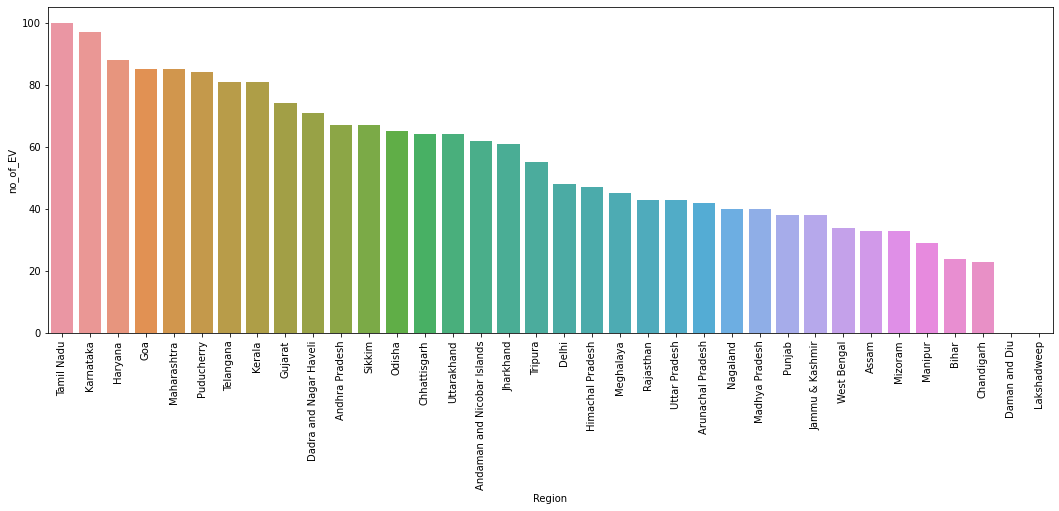

In [7]:
plt.figure(figsize=(18,6))
sns.barplot(x='Region',y='no_of_EV',data=df_EV_numbers)
plt.xticks(rotation=90)
plt.show()

# Interim Conclusion on operational electric vehicles in Indian states

## 1) South India
#### a) Tamil Nadu and Karnataka has highest number of operational electric vehicles both EV bikes and EV cars and the demand is growing
#### b) other states like Puducherry, Telangana, Kerala, Andhra pradesh, Tripura has relatively high numbers and growing demands

## 2) West India
#### a) Goa and Maharashtra has the highest number in operational EVs and relatively good increase in demand
#### b) Gujarat and Dardra and Nagar Haveli has a slow start but demands are still rising

## 3) North India
#### a) Haryana listed as the one of the highest number of operational EVs currently among highest growing demand in entire north india region
#### b) Delhi being the capital of india and highest number of charging station available had a slow start and slow demand rise
#### c) Other north indian states like Uttarakhand have realtively good number.
#### d) Himachal pradesh, Rajasthan, Uttar pradesh, Punjab and Jammu & Kashmir have relatively slow start

## 4) East India
#### a) Andaman & Nicobar, Odisha and Jharkhand has highest operational EVs in east india region
#### b) other states like Bihar and West Bengal have slow start and comparitively less demand

## 5) Central India
#### a) Chattisgarh have good numbers in operational EVs
#### b) Madhya pradesh have a slow start in EV usage and the demand rise is still low

## 6) North East India
#### a) Being the region of india having less infrastructure in EV charging facility, india's north east proving to be a great shot in EVs
#### b) Sikkim is a state who surpassed central india, with relatively greater number of operational EVs
#### c) Other states like Meghalaya and Nagaland has a competitive numbers as compared with other states and keeping in mind that north india is still under developed with respect to charging stations
#### d) Assam, Mizoram and Manipur have a slow start.

## 7) Daman and Diu and Lakshadweep
#### a) In this region, the data was missing so to remove null values, the null values are replaced with zero


# Final Interim Conclusion:
## 1) South India being a Tech Hub is a backbone of EV demands
## 2) In earlier part, we analysed that south indian states has good number of charging stations available
## 3) Popular car brand's manufacturing plants and main head headquarter's are in south india as well, which plays an important role for ease of survey and fulfil consumer's demands by these top companies
## 4) Delhi had highest number of charging stations (analysed earlier), but still EV popularity is relatively low
## 5) North east india is gaining popularity in EV despite less infrastructure
## 6) Other states and regions specially North, West, East and Central india has a balanced numbers and competitive demands.
## 7) We did not get any survey information on Daman and Diu and Lakshadweep, so this 2 regions is not analysed properly

# 3)

# We saw the current scenario charging infrastructure and number of operational Electric Vehicles in different regions in India
# Now let's Dive into some analysis of why people like Non Electric vehicles so much
# Why and how much is the popularity of fossil fuel vehicles in India

In [8]:
df = pd.read_csv('car_data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


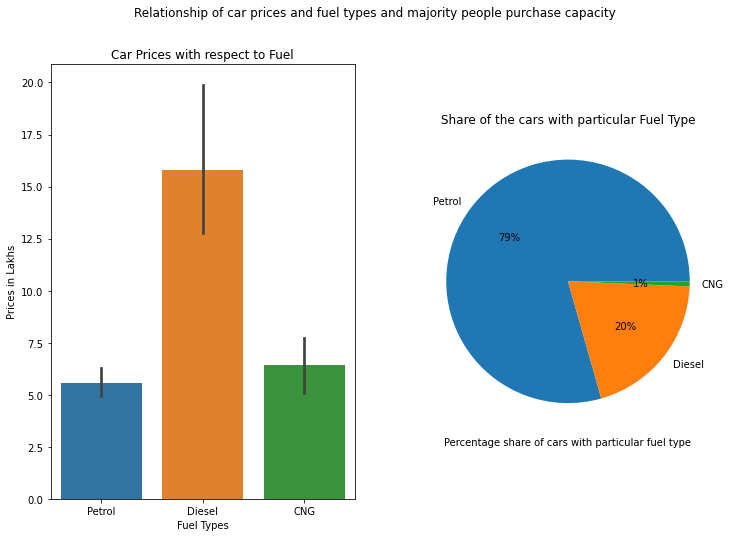

In [9]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

fig.suptitle("Relationship of car prices and fuel types and majority people purchase capacity")

axes[0].set_title("Car Prices with respect to Fuel")
ax1 = sns.barplot(x = list(df['Fuel_Type']),y = list(df['Present_Price']),data=df,ax=axes[0])
ax1.set(xlabel = "Fuel Types",ylabel = "Prices in Lakhs")

dict_df = dict(df['Fuel_Type'].value_counts())
plt.subplot(122)
plt.pie(list(dict_df.values()),labels=list(dict_df.keys()),autopct='%.0f%%')
plt.title("Share of the cars with particular Fuel Type")
plt.xlabel("Percentage share of cars with particular fuel type")

plt.show()

# Visualiztion:
## 1) Bar Charts:
#### a) We can observe clearly, prices of petrol cars are cheaper than CNG cars and Diesel cars.
#### b) Diesel cars are one of the most costly cars as petrol cars and CNG cars combined.

## 2) Pie Chart:
#### a) Petrol cars are the most popular cars occupying 79% of its share in its competition. it is understandable because petrol cars are cheaper than Diesel cars and CNG cars.
#### b) Diesel cars, despite being costly, it occupies a noteworthy share of 20% of the popularity
#### c) Diesel cars are more popular than CNG, this is because current diesel engines have greater performaces than both petrol engines and CNG engines
#### d) Diesel cars are also very much long lasting running cars as compared to both bot the other cars, that's why it has more popularity
#### e) CNG cars have lowest popularity, just because this car lacks competitive performance, and engine durability. CNG cars only have good fuel economy, because CNG is cheap.

# Observation:
## 1) Vehicle Price is a big concern, First Majority of public buying petrol cars because of the its cheap price
## 2) Second majority of public buying diesel cars, the public interested for high performance and long lasting low maintenance car.
## 3) Very less groups of public is interested in Fuel Economy provided by CNG cars

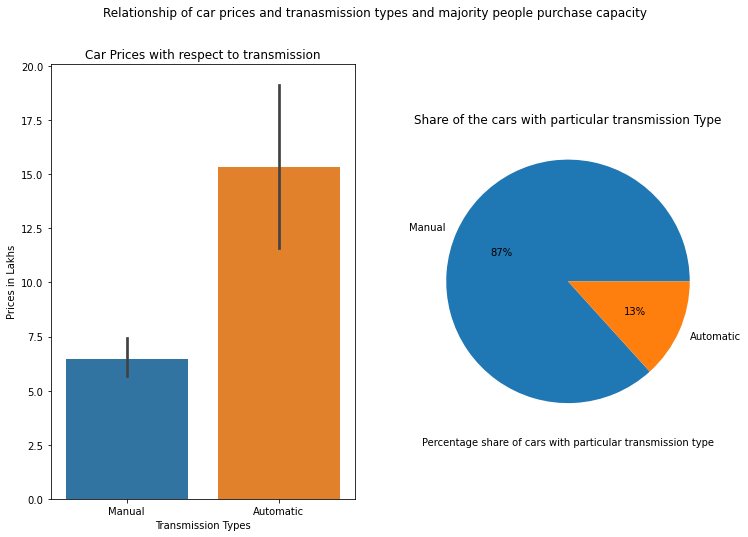

In [10]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

fig.suptitle("Relationship of car prices and tranasmission types and majority people purchase capacity")

axes[0].set_title("Car Prices with respect to transmission")
ax = sns.barplot(x = list(df['Transmission']),y = list(df['Present_Price']),data=df,ax=axes[0])
ax.set(xlabel = "Transmission Types",ylabel = "Prices in Lakhs")


dict_df = dict(df['Transmission'].value_counts())
plt.subplot(122)
plt.pie(list(dict_df.values()),labels=list(dict_df.keys()),autopct='%.0f%%')
plt.title("Share of the cars with particular transmission Type")
plt.xlabel("Percentage share of cars with particular transmission type")

plt.show()

# Visualiztion:
## 1) Bar Charts:
#### 1) Price of automatic transmission cars are always higher than the manual transmission cars
#### 2) Reason behind this is low maintenance cost of manual transmission cars and new manual transmission cars are cheaper
#### 3) Maintainence cost and entire new car cost of automatic transmission cars are high

## 2) Pie charts:
#### 1) Manual transmission cars are most popular, reason behind this is low maintenance and long durability
#### 2) Automatic transmission has a significant growth in popularity in recent times

# Observation
## 1) Traditionally many cars had a manual transmission, so majority public may have a type of habit to drive manual transmission cars
## 2) low price and low maintenance cost is another factor for popularity of manual transmission cars
## 3) Currently automatic transmission cars have high price and high maintenance cost due to its complexity of engineering
## 4) Even if automatic transmission has high price, still it is popular between public
## 5) Therefore, we can conclude that people can buy high priced vehicles if good amount of features and luxury is guaranteed to be delivered
## 6) Price economy still a concern over other features

# Interim Conclusion
### 1) After this observation, we can come to a point that, the vehicle price, maintenance and durability is a big concern for the people
### 2) Low maintenance cost and vehicle durability is one thing to be considered, but vehicle price should be taken care of very seriously

# .................................................................................................................................

# Uptill now we visualized public tendency towards buying a vehicle
### 1) we saw people are more leaned towards economical and budget vehicles
### 2) we saw the infrastructure for electric vehicles provided by the government
### 3) we saw the popularity of electric vehicles in different parts of india

# Now lets dive in more deeper and let's find out what makes EVs more perfect choice than fossil fuel vehicles
# We will conduct Market Segmentation analysis on public reviews on electric vehicles with machine learning techniques

# 4) Market Segmentation Analysis on some Popular cars available in the market

In [11]:
# Step 2) Collecting the data from carwale.com
reviews = pd.read_csv('4-wheeler-EV-carwale.csv')
reviews.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


# Step 3) Exploring the Data

In [12]:
df_ratings = reviews[['Comfort','Performance','Fuel_Economy','Value_for_Money','Rating']]

df_ratings.head()

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,4,5,5,5,5
1,1,1,1,1,0
2,5,5,5,4,5
3,5,5,5,5,5
4,4,5,3,2,3


# Quick comment
##### Exterior Feature of EV is not considered for segmentation as because this feature is completely depend on companies design methodology

In [13]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Comfort          129 non-null    int64
 1   Performance      129 non-null    int64
 2   Fuel_Economy     129 non-null    int64
 3   Value_for_Money  129 non-null    int64
 4   Rating           129 non-null    int64
dtypes: int64(5)
memory usage: 5.2 KB


In [14]:
rating_feature = ['Comfort','Performance','Fuel_Economy','Value_for_Money','Rating']
for feature in rating_feature:
    df_ratings[feature] = np.where(df_ratings[feature] > 3,1,0)
    
df_ratings.mean().round(2)

Comfort            0.88
Performance        0.86
Fuel_Economy       0.86
Value_for_Money    0.76
Rating             0.84
dtype: float64

# comments

### The average values of the transformed binary numeric segmentation variables indicate that - 
#### 88% of the reviews are positive on comfort and those people consider present EVs are more comfortable
#### 86% of the people considered EV delivering good performance with respect to electric fuel economy of the battery
#### whereas 76% of the respondants believe the EVs were a value for money and recommended others to buy it

## Overall Rating, we see that 84% of the respondants have positive reviews on current EVs


# Exterior Feature of EV is not considered for segmentation as because this feature is completely depend on companies design methodology

# Step 4) Principle Componants Analysis

In [15]:
## Scaling the data
scaler = StandardScaler()
scaler.fit(df_ratings)
scaled_data = scaler.transform(df_ratings)

In [16]:
pca = PCA(n_components=5).fit(scaled_data)
transformed_df = pca.transform(scaled_data)
df_PCA = pd.DataFrame(transformed_df, columns=df_ratings.columns)
df_PCA

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
1,5.284841,-0.481989,-0.594537,-0.170641,0.013197
2,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
3,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
4,2.611371,-0.488159,2.181804,-0.090110,1.801597
...,...,...,...,...,...
124,0.073301,0.439265,1.425795,0.910254,-0.860756
125,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
126,-0.965448,-0.028228,-0.134805,-0.045831,0.050562
127,-0.965448,-0.028228,-0.134805,-0.045831,0.050562


#### Here, we calculate principal components because we use the resulting components to rotate and project the data for the perceptual map.

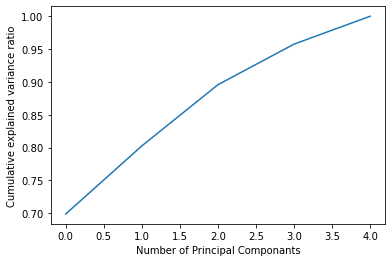

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Componants")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

In [18]:
sd_arr = df_PCA.describe().loc['std']
pca_frame = pd.DataFrame({'std':sd_arr})
sd = pca_frame['std']
pca_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
pca_frame['Cumulative_Proportion'] = np.cumsum(pca_frame['variance'])
pca_frame.head()

,std,variance,Cumulative_Proportion
Comfort,1.876813,0.699024,0.699024
Performance,0.722525,0.103599,0.802623
Fuel_Economy,0.685231,0.093180,0.895803
Value_for_Money,0.557821,0.061750,0.957554
Rating,0.462481,0.042446,1.000000


### comments
##### Results from principal components analysis indicate that the three components 'Performance','Fuel Economy' and 'Value for Money' capture about more than 50% of the information contained in the segmentation variables

In [19]:
pca_df = pd.DataFrame(pca.components_.round(3),columns=df_ratings.columns)
pca_df

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,-0.437,-0.454,-0.425,-0.444,-0.474
1,0.379,-0.411,0.700,-0.200,-0.396
2,0.602,0.311,-0.306,-0.667,0.046
3,-0.520,0.590,0.450,-0.409,-0.108
4,0.182,0.423,-0.178,0.389,-0.777


In [20]:
X = []
for feature in pca_df.columns:
    X.append(np.array(pca_df[feature]).reshape(1,-1))
    
col = list(pca_df.columns)
df_PC = pd.DataFrame()

for j in range(0,5):
    df_PC = df_PC.append(pd.DataFrame(X[j],columns=['PC{}'.format(i) for i in range(1,6)]),ignore_index=True)
    
df_PC[''] = pd.Series(col)
df_PC.set_index(keys='',inplace=True)
df_PC

,PC1,PC2,PC3,PC4,PC5
,,,,,
Comfort,-0.437,0.379,0.602,-0.520,0.182
Performance,-0.454,-0.411,0.311,0.590,0.423
Fuel_Economy,-0.425,0.700,-0.306,0.450,-0.178
Value_for_Money,-0.444,-0.200,-0.667,-0.409,0.389
Rating,-0.474,-0.396,0.046,-0.108,-0.777


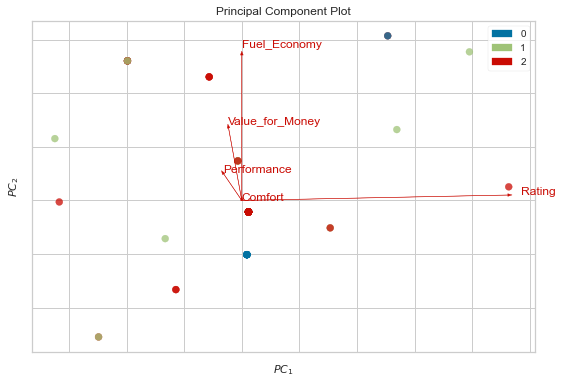

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [21]:
from yellowbrick.features.pca import PCADecomposition
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = le.fit_transform(reviews['Sentiments'])
df_PCA['sentiments'] = col
X = df_PCA.drop(columns = 'sentiments')
y = df_PCA['sentiments']
visualizer = PCADecomposition(scale=True, proj_features = True, color = None)
visualizer.fit_transform(X, y)
visualizer.show()

## Visual Plot
### PC1 and PC2 are the 2 componants captured highest of information contained in segmentation variables 
### The above Principal Component Plot shows clearly:
##### 1) According to first principal Componant(PC1) we assess the fact that value for money, the performance and the Fuel economy feature of the EV has similar percentage and closest positive ratings
##### 2) Overall rating is at attrative coordinate according to both the principal componants (PC1 and PC2)

# Step 5) Extracting Segments

Text(0, 0.5, 'Sum of Within Cluster Distances')

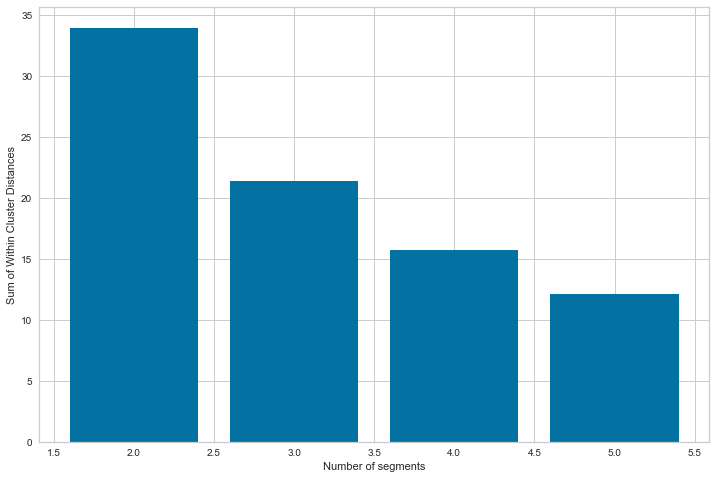

In [22]:
# K-Means Clustering
k_range = range(2, 6)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=7, random_state=0)
    model.fit(df_ratings)
    labels = model.predict(df_ratings)
    inertias.append(model.inertia_)
    k_result.append(labels)
    
plt.figure(figsize=(12,8))
plt.bar(range(2, 6), inertias)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Within Cluster Distances')

### comments
##### 1) Extract between two and six segments because we do not know in advance what the best number of market segments is.
##### 2) The values to decrease because more market segments automatically mean that the segments are smaller and, as a consequence, that segment members are more similar to one another.

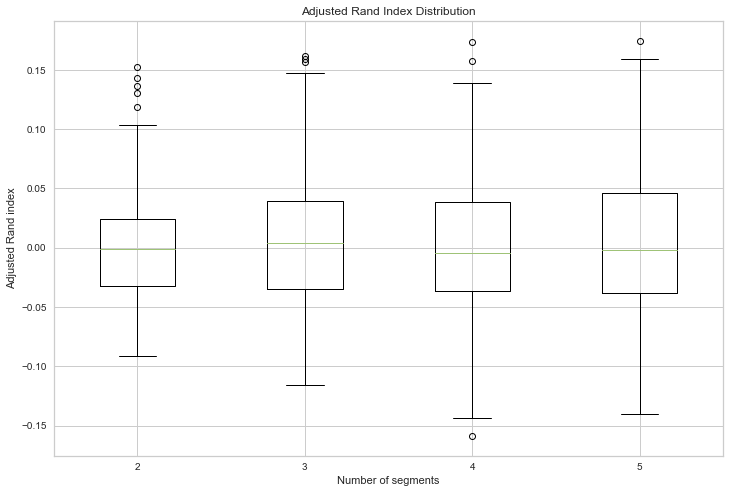

In [23]:
n_boot = 100*2
plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 6))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()


### Comments
#### According to the boxplot, we can assess that the 4 segment and 5 segment solution will be the most stable and, with most of the captured information present.
#### while on the other hand, the other clusters have comparably less information

In [24]:
#creating segment
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_ratings)
label4 = model.predict(df_ratings)
label4

array([0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0, 3])

In [25]:
# using mixture of distribution
score,aic,bic = [],[],[]

models = []
for k in range(2, 6):
    model = GaussianMixture(n_components=k, n_init=10,random_state=10)
    model.fit(df_ratings)
    models.append(model)
    score.append(model.score(df_ratings))
    aic.append(model.aic(df_ratings))
    bic.append(model.bic(df_ratings))

table = pd.DataFrame({
    'k': k_range,
    'LogLike': score,
    'AIC': aic,
    'BIC': bic
})


table

,k,LogLike,AIC,BIC
0,2,6.819348,-1677.391892,-1560.139584
1,3,8.352548,-2030.957342,-1853.648973
2,4,12.846137,-3148.303357,-2910.938928
3,5,13.935205,-3387.282885,-3089.862395


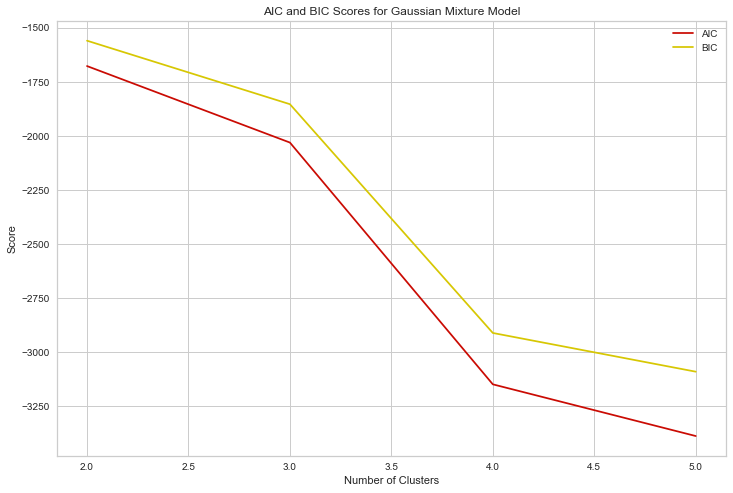

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, aic, label='AIC',color='r')
plt.plot(k_range, bic, label='BIC',color='y')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

### Comments
##### From the plot above, we can clearly see that the 4  and 5 market segment solution have some stability here 4 market segment solution makes some stabilty and the curves flatten for a while

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

g_mixture = GaussianMixture(n_components=5, n_init=10, random_state=0)
g_mixture.fit(df_ratings)

cluster_of_g_mixture = g_mixture.predict(df_ratings)

KMC = KMeans(n_clusters=4,n_init=10,random_state=0)
KMC.fit(df_ratings)
labels = KMC.predict(df_ratings)

confusion_matrix = confusion_matrix(labels, cluster_of_g_mixture)

print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 [[96  0  0  2  0]
 [ 0  1 11  0  0]
 [ 0  6  0  1  0]
 [ 0  0  0  4  8]
 [ 0  0  0  0  0]]


### Component (segment) members derived from the mixture model are shown in columns and, cluster (segment) members derived from k-means are shown in rows.

# Step 6) Profiling Segments

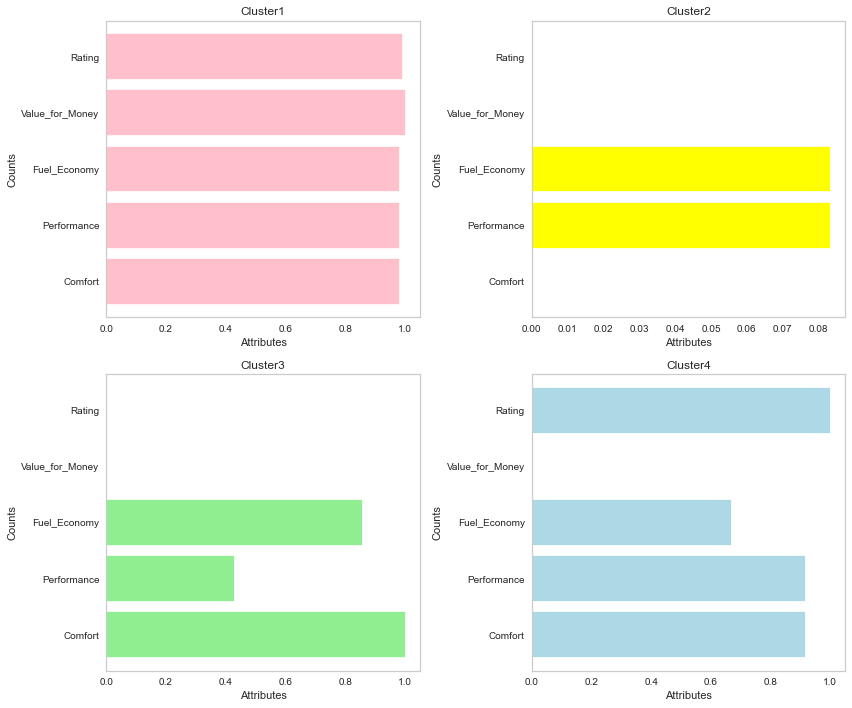

In [28]:
df_copy = df_ratings.copy()
df_copy['segments'] = label4

cluster_dict = {
    'Columns': df_ratings.columns,
    'Cluster1': np.array(np.zeros(6)),
    'Cluster2': np.array(np.zeros(6)),
    'Cluster3': np.array(np.zeros(6)),
    'Cluster4': np.array(np.zeros(6))
}


segment_counts = df_copy["segments"].value_counts().sort_index()
for i, value in enumerate(segment_counts):
    temp = df_copy[df_copy['segments'] == i].drop(columns="segments")
    temp = temp.sum()/value
    cluster_dict["Cluster{}".format(i+1)] = temp.values

profile_plot_data= pd.DataFrame(cluster_dict)

cluster_list = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(cluster_list,1):
    k_range = [0,1,2,3,4]
    if idx==1: 
        color="pink"
    elif idx==2:
        color="yellow"
    elif idx==3:
        color="lightgreen"
    else:
        color="lightblue"
    plt.subplot(2, 2, idx)
    bars = plt.barh(profile_plot_data['Columns'], profile_plot_data[cluster],edgecolor='black',facecolor='none')
    for i in k_range:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(cluster)
    

plt.tight_layout()

plt.show()

#### 1) The barplot plots the percentage of respondents within each segment who associate each perception for EV.
#### 2) Marker variables are coloured differently for each segment. 
#### 3) All other variables are whited out

# Step 7) Describing Segments

In [29]:
# Describing Segments

reviews.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


<Figure size 864x576 with 0 Axes>

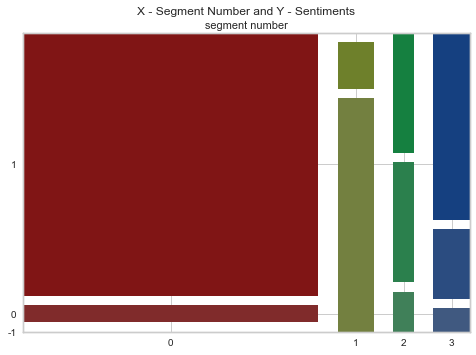

In [30]:
# Let's visualize which we cannot able see in above segment analysis

temp_col = reviews['Sentiments'].replace({
    "Positive":1,
    "Nuetral":0,
    "Negative":-1
})

frame = pd.DataFrame({
    'segment': label4,
    'sentiments': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['sentiments'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k:"")

plt.xlabel('segment number')
plt.ylabel('Sentiments',rotation=90)
plt.title("X - Segment Number and Y - Sentiments")
plt.show()

### Mosaic plot remarks
#### 1) Members of segment 1 (depicted in the first column) expresses most positive responses of EVs the top left boxes being coloured in red. 
#### 2) In stark contrast, members of segment 2 expresses Negative Thoughts (as indicated by the pale green bar boxes).
#### 3) segment 3 provides info about people expressing balanced responses (as indicated by dark green color)
#### 4) segment 4 have majority of positive responses (as indicated by dark blue color)

In [31]:
le = LabelEncoder()

frame = pd.DataFrame({
    'segment': label4,
    'sentiments': temp_col,
    'Driven': reviews['Driven'],
    'Model': reviews['Model_name']
})

driven = {
    'Few hundred kilometers':2, "Haven't driven it":0,
       'Few thousand kilometers':3, 'Did a short drive once':1,
       'Its my mate since ages':4
}

frame['Driven_num'] = frame['Driven'].map(driven)
frame["Model_num"] = le.fit_transform(reviews['Model_name'])+1

driven = frame.groupby('segment')['Driven_num'].mean()
sentiments = frame.groupby('segment')['sentiments'].mean()
model = frame.groupby('segment')["Model_num"].mean()

driven

segment
0    1.734694
1    1.250000
2    1.142857
3    1.333333
Name: Driven_num, dtype: float64

In [32]:
sentiments # 1 Negative sentiment and 3 positive sentiments can be observed from the 4 segments

segment
0    0.938776
1   -0.833333
2    0.285714
3    0.583333
Name: sentiments, dtype: float64

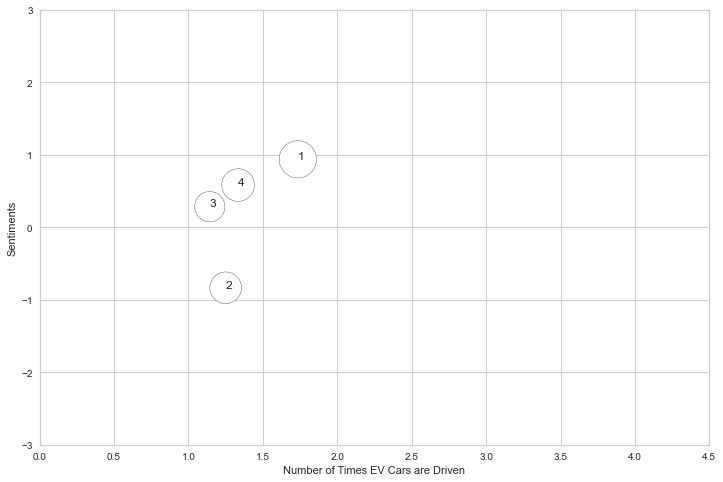

In [33]:
plt.figure(figsize=(12, 8))
plt.scatter(driven, sentiments, s=driven*800,color='white',edgecolor="black")

for i, segment in enumerate(driven.index):
    plt.text(driven[segment], sentiments[segment], str(i+1))

plt.xlim(0, 4.5)
plt.ylim(-3, 3)

plt.xlabel('Number of Times EV Cars are Driven')
plt.ylabel('Sentiments')

plt.show()

# Final Observation

## In Fig above the frequency of driving EV cars is plotted along the x-axis and, The sentiments is plotted along the y-axis.
##### 1) Market segments 1 are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like EVs and recommend others to buy it. These segments need to be retained, and their feedbacks must be considered seriously.
##### 2) Market segment 3 and 4 also provides positive sentiments towards EVs but there driving frequency is less. Therfore, There feedbacks are also important and need special attention as well for the betterment in the Electric Vehicle.
##### 3)Market segment 2 is located at least attractive position, members in this segment not having positive attitude towards EV, Thus making them unattractive as a potential market segment

# Interim Conclusion
##### 1) Most of the people have Positive Sentiments and Positive Reviews for the Electric Vehicles as they try for once or driving the car since ages
##### 2) In segmentation, it is also observed that people are excited to buy after test drive, (This is observed by segment 1, which represent a short drive (look into the driven dictionary in the code)). Segment 1 is observed to be positioned in more attractive quadrant.
##### 3) So we can conclude from this segmentation that people will buy EVs if the like the products and its feature with a reasonable range of price
##### 4) We also conclude that EV popularity is rising with new cars are incomming with pocket friendly price

# .................................................................................................................................

# Many Analysis Steps done so far we come into some observations as listed below
##### 1) Availability of government provided charging infrastructure in india
##### 2) Popularity of electric vehicles in various regions in india
##### 3) Popularity and difference between different Non-Electric Vehicles on the basis of prices, fuel types and transmission
##### 4) Behavior of people and there tendency to change from traditional fuel vehicle to electric vehicle on the basis of there reviews and recommendation provided (Segmentation analysis done for this conclusion to make)

# Now if we need to produce an Electric Vehicle which can compete to the bigger brands in India we need to clear some concepts
#### 1) Our upcoming Electric Vehicle should be within budget of the majority of public in india
#### 2) Majority of the people likes features as well, we analysed this earlier in segmentation
#### 3) Majority of the people wants more fuel economy for good drive range
#### 4) Performance is also a amin concern, we observed this when we were comparing petrol and diesel cars

## To address this issues, lets create a dataframe of general range of price, Battery Capacity, Drive Range, Power and charging time

In [34]:
# New

df = pd.read_csv('EV_Cars_India_2023_cleaned.csv')
df.head()

,Car_name,transmission,Car_price(rs),Battery_Capacity(KwH),Drive_range(KMs),Power(Bhp),Charge_time(Hours)
0,MG Comet EV,Automatic,798000,17.30,230.0,41.42,7.0
1,Tata Tiago EV,Automatic,1199000,19.20,250.0,60.34,1.0
2,Tata Tigor EV,Automatic,1375000,26.00,315.0,73.75,7.5
3,MG ZS EV,Automatic,2740000,50.30,461.0,174.33,9.0
4,BYD Atto 3,Automatic,3449000,60.48,521.0,201.15,10.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_name               30 non-null     object 
 1   transmission           30 non-null     object 
 2   Car_price(rs)          30 non-null     int64  
 3   Battery_Capacity(KwH)  30 non-null     float64
 4   Drive_range(KMs)       30 non-null     float64
 5   Power(Bhp)             30 non-null     float64
 6   Charge_time(Hours)     30 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ KB


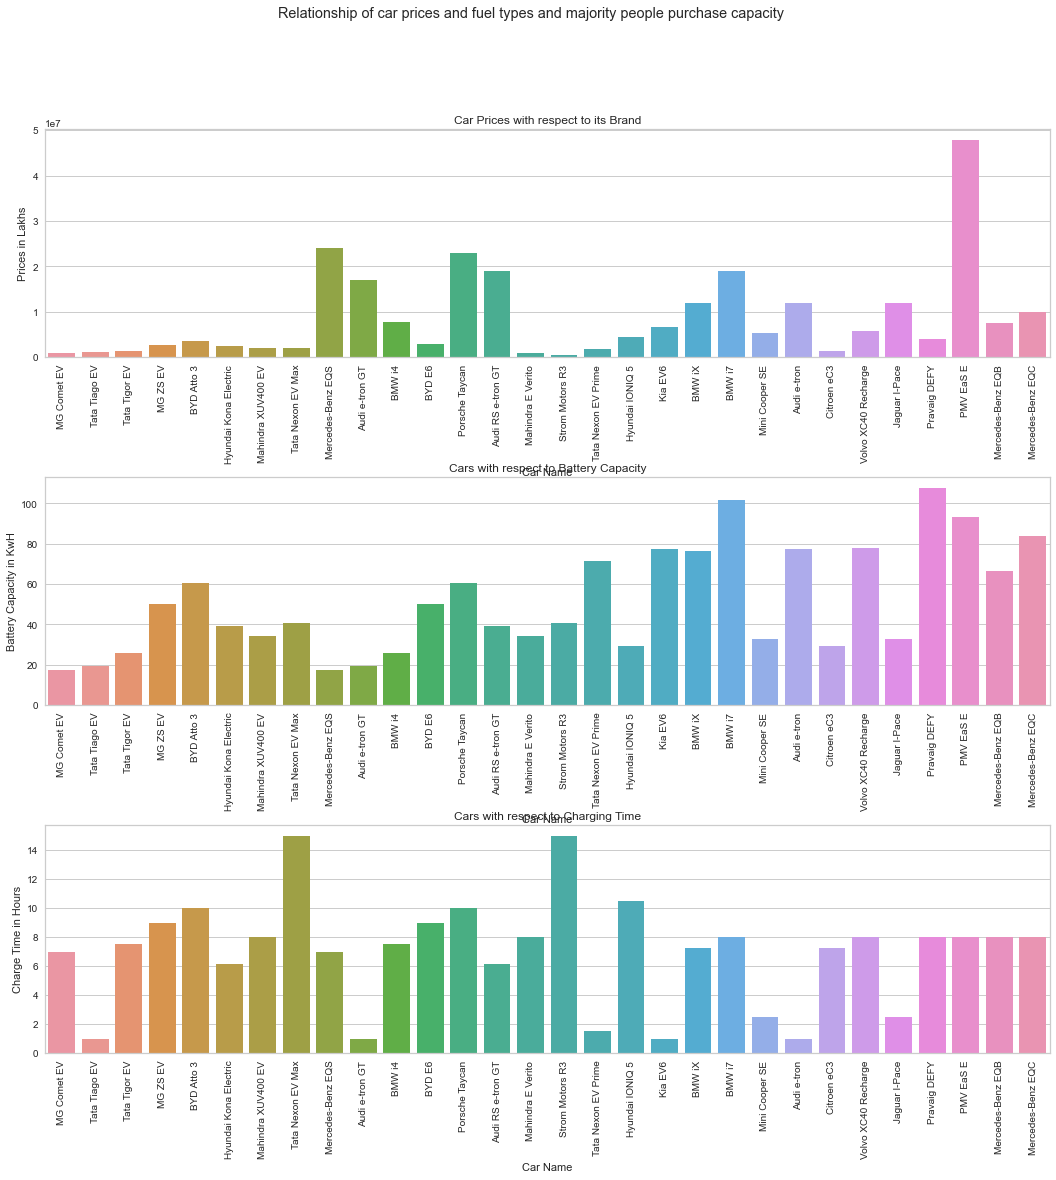

In [36]:
fig,axes = plt.subplots(3,1,figsize=(18,17))

fig.suptitle("Relationship of car prices and fuel types and majority people purchase capacity")
fig.subplots_adjust(hspace=0.525, wspace=0.525)

axes[0].set_title("Car Prices with respect to its Brand")
ax1 = sns.barplot(x = list(df['Car_name']),y = list(df['Car_price(rs)']),data=df,ax=axes[0])
ax1.set(xlabel = "Car Name",ylabel = "Prices in Lakhs")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)


axes[1].set_title("Cars with respect to Battery Capacity")
ax2 = sns.barplot(x = list(df['Car_name']),y = list(df['Battery_Capacity(KwH)']),data=df,ax=axes[1])
ax2.set(xlabel = "Car Name",ylabel = "Battery Capacity in KwH")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)


axes[2].set_title("Cars with respect to Charging Time")
ax3 = sns.barplot(x = list(df['Car_name']),y = list(df['Charge_time(Hours)']),data=df,ax=axes[2])
ax3.set(xlabel = "Car Name",ylabel = "Charge Time in Hours")
ax3.set_xticklabels(ax2.get_xticklabels(),rotation=90)

plt.show()

In [37]:
######## Best Car Evaluation

price_dict = pd.Series(df['Car_price(rs)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(price_dict.items(),key=lambda x:x[1]))
top_cheap_ev = []
lis = list(sorted_prices.keys())
for i in range(15):
    top_cheap_ev.append(lis[i])
    

    
### get the car which has good less charging time

charge_dict = pd.Series(df['Charge_time(Hours)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(charge_dict.items(),key=lambda x:x[1]))
less_charge_time = []
lis = list(sorted_prices.keys())
for i in range(25):
    less_charge_time.append(lis[i])
    

    
## get the car with good battery capacity

battery_dict = pd.Series(df['Battery_Capacity(KwH)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(battery_dict.items(),key=lambda x:x[1],reverse=True))
good_battery = []
lis = list(sorted_prices.keys())
for i in range(25):
    good_battery.append(lis[i])
    

    
### get thecars with good drive range
drive_dict = pd.Series(df['Drive_range(KMs)'].values,index = df['Car_name']).to_dict()
sorted_prices = dict(sorted(drive_dict.items(),key=lambda x:x[1],reverse=True))
good_drive_range = []
lis = list(sorted_prices.keys())
for i in range(25):
    good_drive_range.append(lis[i])
    
good_drive_range # Top cars with good battery capacity

['Pravaig DEFY',
 'Kia EV6',
 'Audi e-tron',
 'BMW i7',
 'Volvo XC40 Recharge',
 'Mercedes-Benz EQC',
 'BYD Atto 3',
 'Porsche Taycan',
 'PMV EaS E',
 'MG ZS EV',
 'BYD E6',
 'Tata Nexon EV Max',
 'Strom Motors R3',
 'Hyundai Kona Electric',
 'Audi RS e-tron GT',
 'BMW iX',
 'Citroen eC3',
 'Tata Nexon EV Prime',
 'Mercedes-Benz EQB',
 'Mahindra XUV400 EV',
 'Mahindra E Verito',
 'Hyundai IONIQ 5',
 'Tata Tigor EV',
 'BMW i4',
 'Mini Cooper SE']

In [38]:
###  get top cars with have less priced, good battery capacity, less charging time, good drive range

best_cars = []

for car in top_cheap_ev:
    if car in good_drive_range and car in good_battery and car in less_charge_time:
        best_cars.append(car)
        
best_cars

['Mahindra E Verito',
 'Citroen eC3',
 'Tata Tigor EV',
 'Tata Nexon EV Prime',
 'Mahindra XUV400 EV',
 'Hyundai Kona Electric',
 'MG ZS EV',
 'BYD E6',
 'Pravaig DEFY']

In [39]:
###################### The Below data frame has the best cars with respect to price, battery, brand, charge time and range
indexes = []
for car in best_cars:
    i = np.where(df['Car_name'] == car)
    indexes.append(i[0][0])

new_frame = pd.DataFrame()
for index in indexes:
    new_frame = new_frame.append(df.iloc[index],ignore_index=True)
    
new_frame

,Car_name,transmission,Car_price(rs),Battery_Capacity(KwH),Drive_range(KMs),Power(Bhp),Charge_time(Hours)
0,Mahindra E Verito,Automatic,946000,34.5,375.0,95.00,8.00
1,Citroen eC3,Automatic,1276000,29.2,425.0,321.84,7.25
2,Tata Tigor EV,Automatic,1375000,26.0,315.0,73.75,7.50
3,Tata Nexon EV Prime,Automatic,1719000,71.7,415.0,93.87,1.50
4,Mahindra XUV400 EV,Automatic,1898999,34.5,375.0,148.00,8.00
5,Hyundai Kona Electric,Automatic,2403000,39.2,452.0,134.10,6.16
6,MG ZS EV,Automatic,2740000,50.3,461.0,174.33,9.00
7,BYD E6,Automatic,2915000,50.3,461.0,174.33,9.00
8,Pravaig DEFY,Automatic,3950000,107.8,857.0,516.29,8.00


In [40]:
# Lets get the Best range prices and the best technical detail


min_price = min(list(new_frame['Car_price(rs)']))
max_price = max(list(new_frame['Car_price(rs)']))
min_capacity = min(list(new_frame['Battery_Capacity(KwH)']))
max_capacity = max(list(new_frame['Battery_Capacity(KwH)']))
min_drive_range = min(list(new_frame['Drive_range(KMs)']))
max_drive_range = max(list(new_frame['Drive_range(KMs)']))
min_power = min(list(new_frame['Power(Bhp)']))
max_power = max(list(new_frame['Power(Bhp)']))
min_charge_time = min(list(new_frame['Charge_time(Hours)']))
max_charge_time = max(list(new_frame['Charge_time(Hours)']))

Best_Range = {
    "Price_Range":"{0} Lakhs - {1} Lakhs".format(min_price,max_price),
    "Battery_Capacity":"{0} KwH - {1} KwH".format(min_capacity,max_capacity),
    "Driving_Range":"{0} KMs - {1} KMs".format(min_drive_range,max_drive_range),
    "Power_Range":"{0} BHP - {1} BHP".format(min_power,max_power),
    "Charging_Time_Range":"{0} Hours - {1} Hours".format(min_charge_time,max_charge_time),
}

Best_Range = pd.Series(Best_Range).to_frame()
Best_Range.rename(columns={0:'Ranges'},inplace=True)
Best_Range

,Ranges
Price_Range,946000 Lakhs - 3950000 Lakhs
Battery_Capacity,26.0 KwH - 107.8 KwH
Driving_Range,315.0 KMs - 857.0 KMs
Power_Range,73.75 BHP - 516.29 BHP
Charging_Time_Range,1.5 Hours - 9.0 Hours


In [41]:
os.makedirs(os.getcwd(),exist_ok=True)
Best_Range.to_csv(os.path.join("Best_Range.csv"),header=False,index=False)

## Comments
#### 1) We comeup with a competitive range of price. our product price range should be within range or more economical if possible
#### 2) We defined a range of Kilo-Watt Hour battery capacity.
#### 3) The defined batteries should produce significant range of power as defined in the data frame
#### 4) We have to see if we can improve more on driving range provided, but our driving range should be at maximum of given range
#### 5) Time taken to charge a battery should be within the range

# .................................................................................................................................

# Final Conclusion
### Geographic and Demographic analysis 
##### 1) We analysed that south india region is more technologically advanced with good availability of charging infrastructure and Electric vehicles becoming more popular. Big Brands who already launched their products and have there manufacturing plants in south india. It is possible that we can create space for oue EVs but it will ber very difficult
##### 2) North Eastern states have growing popularity specially sikkim, this is a good place for us to create space for our EVs
##### 3) Once our EV popularity grows up, we can target to East indian states and central indian states

### Psychographic and Behavioral analysis
##### 1) From Reviews Dataset from carwale.com, we did a market segmentation on people's reviews on EVs whether they have positve approach towards it. we found that 3 out 4 have positive approach and are likely to buy new EV. Those who have done small test drive are likely to buy. Those who already driving regularly are recommending others to buy it.
##### 2) Competitive prices, More features and good performance in EVs are key points to be considered, as in the analysis i come up with the observation of the people more tended to buy low priced and low maintenance cost vehicles

# Final Thoughts on Startup Strategy
##### 1) In case of E-Bikes we can target some East Indian states like Bihar and West Bengal as the economic condition of majority of people is low so a good competitive E-bike with good amount of features and reasonable price range will be a good choice. Central Indian States like Madhya pradesh will also a good choice to introduce E-Bikes
##### 2) In case of E-Cars North-East India and Central India should be the first choice region as they have good popularity of EVs. East indian states would be the second choice after the popularity of the startup improves and we are safe to grow our business.
##### 3) North Indian states are not recommended right now because of the analysis results. People are not buying EVs despite having lots of charging infrastructure.
##### 4) South indian states should be kept for future as there are already many international brands launched there EVs at competitive prices and tones of features. so South india will not be a safe option right now.